# Evaluaci√≥n 2

---



**Autor:**

**Correo Electr√≥nico:**

**Fecha de Creaci√≥n:** Junio 2025

**Versi√≥n:** 1.0  



---

## Descripci√≥n

Este notebook corresponde al desarrollo de la entrega 2 de la asignatura electiva de Machine Learning de DuocUC - Sede Concepci√≥n

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuaci√≥n se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versi√≥n instalada ejecutar usando el siguiente comando, usando la librer√≠a de la cual quieres saber la versi√≥n:

```bash
import pandas as pd
print(pd.__version__)
````

# Fase 0 - Cargar de los datos

## 1. Importaci√≥n e instalaci√≥n de librer√≠as

In [80]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, StratifiedKFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings
from numpy import expm1

## 2. Carga de datos

In [82]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

--2025-06-04 11:02:59--  https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6 [following]
--2025-06-04 11:02:59--  https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b6ffc73b87a1263b3abbf589a.dl.dropboxusercontent.com/cd/0/inline/Cq8h6rBM5pALdjHZPwYmwhI_JkVNP9RbUlb2jVc09LIwHdQacgcfyn7txOZvPpU5yYda_SLctOcYDprjOSnSj7322Sg58a0QOWHSUg-dcz9f0LFYRp7Pyv0qtXIq1EVsGvZQQW-BB66wjLhJVruTps6M/file# [following]
--2025-06-04 11:02:59--  https://uc8b6ffc73b87a1263b3abbf58

In [83]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory = False)
data

Id  Subsegmento Sexo  Region  Edad   Renta  Antiguedad  Internauta  \
0          1          160    M    13.0    43     NaN         130           1   
1          2          160    H    13.0    46  143640          69           1   
2          3          170    H    13.0    45  929106          24           1   
3          4          151    H    13.0    46  172447         134           0   
4          5          170    H    13.0    46  805250         116           0   
...      ...          ...  ...     ...   ...     ...         ...         ...   
51119  51120          160    H    13.0    51  364978          57           1   
51120  51121          170    H    13.0    51  625376          39           1   
51121  51122          160    H    13.0    47  806220         153           1   
51122  51123          160    M    13.0    47     NaN          11           1   
51123  51124          170    H    13.0    51  840878          75           1   

       Adicional  Dualidad  ...  ColMx_T01  PagoNac_T01  PagoInt_T01  \
0              1         0  ...          0        33000            0   
1              0         0  ...          0       300000            0   
2              1         0  ...          0       216676            0   
3              1         0  ...          0        60000            0   
4              1         1  ...          0       272925            0   
...          ...       ...  ...        ...          ...          ...   
51119          1         1  ...          0       300000            0   
51120          0         0  ...          0       166098            0   
51121          1         0  ...          0        18891            0   
51122          0         0  ...          0        26528            0   
51123          1         0  ...          0        12360            0   

       EeccNac_T01  EeccInt_T01  UsoL1_T01  UsoL2_T01  UsoLI_T01  IndRev_T01  \
0          1099866            0    1099866      15080          0           R   
1           214592            0     214592      83596          0           R   
2                0            0       7400          0          0           T   
3           272762            0     272762      10591          0           R   
4           249562            0      75339     377782          0           R   
...            ...          ...        ...        ...        ...         ...   
51119       478320            0     478320      12668          0           R   
51120       166098            0          0     572363          0           R   
51121         9652            0       9652      16241          0           R   
51122        24638            0      24638      84982          0           R   
51123        12360            0      18500          0          0           R   

      target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
51119      0  
51120      0  
51121      0  
51122      0  
51123      0  

[51124 rows x 574 columns]

# Fase 3 - Preparaci√≥n de los datos

## 3.1 Limpieza inicial

In [84]:
#Transformaci√≥n columnas con datos string a n√∫merico
columnas_cambiar = ['Fac_T03', 'Fac_T06', 'Fac_T10', 'Fac_T11', 'Fac_T12']

for col in columnas_cambiar:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(data[columnas_cambiar].dtypes)


Fac_T03    float64
Fac_T06    float64
Fac_T10    float64
Fac_T11    float64
Fac_T12    float64
dtype: object


## 3.2 Tratamiento de nulos

In [85]:
FAC_COLS   = [f'Fac_T{str(i).zfill(2)}'   for i in range(1, 13)]
PAGOS_COLS = [f'PagoNac_T{str(i).zfill(2)}' for i in range(1, 13)]
NUM_COLS   = FAC_COLS + PAGOS_COLS

# Copia inmutable del set original
df_raw = data.copy()

# ----------------------- Imputaci√≥n --------------------------
imputer = SimpleImputer(strategy='median')

df_imputed = df_raw.copy()
df_imputed[NUM_COLS] = imputer.fit_transform(df_imputed[NUM_COLS])

# Reemplazar negativos por 0 (antes de log1p)
df_imputed[NUM_COLS] = df_imputed[NUM_COLS].clip(lower=0)

# Guardar etapa de imputaci√≥n
df_imputed.to_parquet("clientes_imputados.parquet", index=False)

## 3.3 Transformaci√≥n de variables

In [86]:
# ----------------------- Transformaci√≥n + Escalado ----------
log1p  = FunctionTransformer(np.log1p, validate=False)
scaler = RobustScaler()

df_transformed = df_imputed.copy()

# 1. Aplicar log1p
df_transformed[NUM_COLS] = log1p.transform(df_transformed[NUM_COLS])

# 2. Aplicar escalado robusto y asegurarse de mantener columnas originales
scaled_array = scaler.fit_transform(df_transformed[NUM_COLS])
df_transformed[NUM_COLS] = pd.DataFrame(scaled_array, columns=NUM_COLS, index=df_transformed.index)

# 3. Guardar etapa final
df_transformed.to_parquet("clientes_imputados_transformados.parquet", index=False)

# 4. Comprobaci√≥n
df_scaled = pd.read_parquet("clientes_imputados_transformados.parquet")
resumen = df_scaled[NUM_COLS].describe()   # <-- solo esas 24
print(resumen.T)


               count      mean       std       min       25%           50%  \
Fac_T01      51124.0 -0.258746  0.463269 -0.893595 -0.893595  0.000000e+00   
Fac_T02      51124.0 -0.239026  0.449668 -0.902140 -0.902140  0.000000e+00   
Fac_T03      51124.0 -0.235838  0.447449 -0.906634 -0.906634  0.000000e+00   
Fac_T04      51124.0 -0.239191  0.448877 -0.905049 -0.905049  0.000000e+00   
Fac_T05      51124.0 -0.250993  0.458656 -0.895724 -0.895724  0.000000e+00   
Fac_T06      51124.0 -0.242946  0.454066 -0.900811 -0.900811  0.000000e+00   
Fac_T07      51124.0 -0.230440  0.441525 -0.911216 -0.911216  0.000000e+00   
Fac_T08      51124.0 -0.243818  0.454285 -0.902270 -0.902270  0.000000e+00   
Fac_T09      51124.0 -0.234549  0.448381 -0.907373 -0.907373  0.000000e+00   
Fac_T10      51124.0 -0.239059  0.455329 -0.903642 -0.903642  0.000000e+00   
Fac_T11      51124.0 -0.226583  0.445641 -0.913179 -0.913179  0.000000e+00   
Fac_T12      51124.0 -0.228937  0.449296 -0.908617 -0.908617  0.

# Fase 4 - Modelamiento

## Modelos de regresi√≥n

### Definici√≥n de Variable objetivo

In [87]:
# Datos base: df_imputed (solo log1p, SIN RobustScaler)
log1p_fac = FunctionTransformer(np.log1p, validate=False).transform(df_imputed[FAC_COLS])
df_log = pd.DataFrame(log1p_fac, columns=FAC_COLS, index=df_imputed.index)

df_log['dFac_T12'] = df_log['Fac_T12'] - df_log['Fac_T11']

y = df_log['dFac_T12']

En esta secci√≥n, trabajamos con las columnas de facturaci√≥n mensual (`Fac_T01` a `Fac_T12`) para construir un modelo supervisado de regresi√≥n que prediga el cambio en la facturaci√≥n del √∫ltimo mes, en base a patrones anteriores.

Se utiliza una transformaci√≥n `log1p` (`log(1 + x)`) sobre las columnas de facturaci√≥n para reducir la asimetr√≠a de los datos y atenuar el impacto de valores extremadamente altos (outliers).

Se define como **variable dependiente (y)** el cambio en facturaci√≥n entre el mes 11 y el mes 12 (`dFac_T12`). Es decir, queremos predecir cu√°nto variar√° la facturaci√≥n en el √∫ltimo mes a partir de los meses anteriores.

Este enfoque permite abordar el problema como una regresi√≥n polinomial, ya que se intentar√° ajustar una funci√≥n que relacione las facturaciones hist√≥ricas y sus variaciones con el cambio futuro de facturaci√≥n.

### Distribuci√≥n de variable objetivo

In [88]:
df_imputed_2 = pd.read_parquet("clientes_imputados.parquet")
fac_cols = [col for col in df_imputed_2.columns if col.startswith('Fac_T')]
perfil_fac = ProfileReport(df_imputed_2[fac_cols], title="Comportamiento Mensual", minimal=True)

perfil_fac.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:00<00:00, 18.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Selecci√≥n de variables independientes

In [89]:
for i in range(2, 12):
    df_log[f'dFac_T{str(i).zfill(2)}'] = df_log[f'Fac_T{str(i).zfill(2)}'] - df_log[f'Fac_T{str(i-1).zfill(2)}']

X = df_log[[f'Fac_T{str(i).zfill(2)}' for i in range(1, 12)] +
           [f'dFac_T{str(i).zfill(2)}' for i in range(2, 12)]]

Para predecir el cambio de facturaci√≥n en el √∫ltimo mes (`dFac_T12`), se utilizan como variables explicativas:

- Las facturaciones de los **primeros 11 meses**: `Fac_T01` a `Fac_T11`
- Las **variaciones mensuales** entre los primeros 11 meses: `dFac_T02` a `dFac_T11`

Estas variables permiten capturar tanto el nivel de facturaci√≥n acumulado como la din√°mica del cambio mes a mes en la facturaci√≥n.


Las variaciones mensuales se expresan de la siguiente forma:

$$
dFac_{T02} = Fac_{T02} - Fac_{T01},\quad
dFac_{T03} = Fac_{T03} - Fac_{T02},\quad \ldots,\quad
dFac_{T11} = Fac_{T11} - Fac_{T10}
$$

### Separaci√≥n datos de entrenamiento y test

### Algoritmo 1 - `Regresion Polinomial`

#### Creaci√≥n del modelo

In [90]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', Ridge(alpha=1.0))
])

El modelo se estructura mediante un Pipeline, que organiza todas las etapas del preprocesamiento y el ajuste:

**StandardScaler**: Estandariza las variables para que tengan media 0 y desviaci√≥n est√°ndar 1. Esto es fundamental para la regresi√≥n polinomial, ya que los t√©rminos elevados al cuadrado pueden tener escalas muy diferentes.

**PolynomialFeatures**: Genera t√©rminos polinomiales de segundo grado (cuadrados y combinaciones entre variables). Por ejemplo, si una entrada es x‚ÇÅ y x‚ÇÇ, se crear√°n nuevas variables como x‚ÇÅ¬≤, x‚ÇÇ¬≤ y x‚ÇÅ¬∑x‚ÇÇ.

**Ridge**: Se utiliza regresi√≥n Ridge (una forma de regresi√≥n lineal con regularizaci√≥n L2) para evitar el sobreajuste, que puede surgir f√°cilmente al trabajar con muchos t√©rminos polinomiales.

#### Entrenamiento y evaluaci√≥n del modelo

In [91]:
tscv = TimeSeriesSplit(n_splits=4)
mae_scores = -cross_val_score(pipe, X, y, cv=tscv,
                              scoring='neg_mean_absolute_error')

Se utiliza **TimeSeriesSplit** con 4 divisiones para evaluar el modelo preservando el orden temporal. Esto es preferible a un **train_test_split aleatorio**, ya que asegura que los datos de entrenamiento siempre ocurren antes que los de validaci√≥n (imitando un escenario real de predicci√≥n temporal).

`sklearn` hace, por cada uno de los 4 folds definidos en **TimeSeriesSplit**:

Divide **X, y** en un sub‚Äêconjunto de entrenamiento (X_train_fold, y_train_fold) y su correspondiente test (X_test_fold, y_test_fold).

Ejecuta internamente pipe.fit(X_train_fold, y_train_fold) para ajustar el pipeline entero (StandardScaler ‚Üí PolynomialFeatures ‚Üí Ridge) sobre ese fold de entrenamiento.

Despu√©s utiliza pipe.predict(X_test_fold) para obtener las predicciones en el fold de validaci√≥n.

#### C√°lculo e interpretaci√≥n de m√©tricas

##### R2

In [92]:
r2_scores = cross_val_score(pipe, X, y, cv=tscv, scoring='r2')   # scoring='r2'
print("R¬≤ por fold :", r2_scores)
print("R¬≤ promedio :", r2_scores.mean())

R¬≤ por fold : [0.32143402 0.33192641 0.35083502 0.32693584]
R¬≤ promedio : 0.3327828221496515


##### MAE

In [93]:
print("MAE promedio (TS CV):", mae_scores.mean())

MAE promedio (TS CV): 3.476462342236134


Este MAE representa en promedio cu√°nto se equivoca el modelo al predecir la variaci√≥n de facturaci√≥n del √∫ltimo mes.

### Algoritmo 2 - `DecisionTreeRegressor`

#### Creaci√≥n del modelo

In [94]:
[ ]
# 1) Importar librer√≠as necesarias para GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

# 2) Definir la rejilla de par√°metros a explorar
param_grid = {
    'max_depth':        [None, 5, 10, 15, 20],
    'min_samples_split':[2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features':     [None, 'sqrt', 'log2']
}

# 3) Instanciar el DecisionTreeRegressor ‚Äúbase‚Äù (sin fijar hiperpar√°metros)
dt_base = DecisionTreeRegressor(random_state=42)

# 4) Configurar KFold de 5 splits para validaci√≥n cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 5) Crear GridSearchCV para optimizar en funci√≥n de R¬≤
grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    scoring='r2',          # Optimizar directamente el coeficiente de determinaci√≥n
    cv=kf,                 # Usar KFold en 5 pliegues
    n_jobs=-1,             # Paralelizar en todos los n√∫cleos disponibles
    verbose=1,             # Mostrar progreso
    return_train_score=True
)

# 6) Definir X e y (ya existentes en tu notebook)
#    X est√° compuesto por las columnas Fac_T01‚Ä¶Fac_T11 y dFac_T02‚Ä¶dFac_T11
#    y = df_log['dFac_T12']
X = df_log[[f'Fac_T{str(i).zfill(2)}' for i in range(1, 12)]
           + [f'dFac_T{str(i).zfill(2)}' for i in range(2, 12)]]
y = df_log['dFac_T12']


#### Entrenamiento del modelo

In [95]:
[ ]
# 1) Dividir X e y en entrenamiento (70 %) y prueba (30 %)
from sklearn.model_selection import train_test_split

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    shuffle=True
)

# 2) Ejecutar GridSearchCV sobre el conjunto de entrenamiento
grid_search.fit(X_train_dt, y_train_dt)

# 3) Extraer los mejores par√°metros hallados
best_params = grid_search.best_params_
print("Mejores par√°metros encontrados:", best_params)

# 4) Instanciar un DecisionTreeRegressor con esos par√°metros √≥ptimos
regressor_dt = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# 5) Entrenar el √°rbol √≥ptimo con todo X_train_dt, y_train_dt
regressor_dt.fit(X_train_dt, y_train_dt)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Mejores par√°metros encontrados: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

Usamos train_test_split tal y como en el Algoritmo 1, pero ahora sobre X e y definidos para el DecisionTree. Esto genera:

X_train_dt y y_train_dt (70 % de las filas)

X_test_dt y y_test_dt (30 % de las filas restantes)
Mantener random_state=42 asegura que la partici√≥n sea siempre la misma.

Con regressor_dt.fit(X_train_dt, y_train_dt) el √°rbol aprende las particiones basadas en las columnas Fac_T01‚Ä¶Fac_T11 y dFac_T02‚Ä¶dFac_T11 para aproximar dFac_T12.



#### Evaluaci√≥n del modelo

#### C√°lculo e interpretaci√≥n de m√©tricas

##### R2

In [96]:
[ ]
# 1) Realizar predicciones sobre el conjunto de prueba
y_pred_dt = regressor_dt.predict(X_test_dt)

# 2) Calcular el coeficiente de determinaci√≥n R¬≤
from sklearn.metrics import r2_score

r2_dt = r2_score(y_test_dt, y_pred_dt)
print(f"R¬≤ (DecisionTree optimizado, prueba): {r2_dt:.4f}")



R¬≤ (DecisionTree optimizado, prueba): 0.3159


Con regressor_dt.predict(X_test_dt) obtenemos las predicciones (y_pred_dt) para el 30 % de los datos que no vio el √°rbol en entrenamiento.

r2_score(y_test_dt, y_pred_dt) devuelve el coeficiente de determinaci√≥n R¬≤, que mide la proporci√≥n de varianza en y_test_dt (los valores reales de dFac_T12) explicada por el modelo.

Un R¬≤ cercano a 1 indica que el √°rbol predice casi perfectamente la variabilidad de dFac_T12.

Un valor cercano a 0 (o negativo) indicar√≠a escasa capacidad del √°rbol para explicar las variaciones reales.

##### MAE

In [97]:
[ ]
# 1) Calcular el Error Absoluto Medio (MAE) sobre el conjunto de prueba
from sklearn.metrics import mean_absolute_error

mae_dt = mean_absolute_error(y_test_dt, y_pred_dt)
print(f"MAE (DecisionTree optimizado, prueba): {mae_dt:.4f}")


MAE (DecisionTree optimizado, prueba): 3.4317


mean_absolute_error(y_test_dt, y_pred_dt) mide la diferencia absoluta promedio entre las predicciones y los valores reales de dFac_T12.

Un MAE bajo implica que, en promedio, el √°rbol ‚Äúse equivoca poco‚Äù en las mismas unidades de dFac_T12 (que en este caso son las diferencias de logaritmo natural de facturaci√≥n mensual).

Por ejemplo, si MAE = 0.05, significa que en promedio la predicci√≥n de Œîlog(Fac_T12) se aleja en 0.05 unidades de logaritmo de la variaci√≥n verdadera.

### Comparaci√≥n de los modelos

### üìù Interpretaci√≥n

* **Desempe√±o global**  
  - Ambos modelos rinden **muy parecido** en esta escala transformada:  
    - R¬≤ ‚âà 0.33  ‚áí explican ~33 % de la variabilidad del cambio de facturaci√≥n.  
    - MAE ‚âà 3.4 ‚Äì 3.5  ‚áí error medio de ~3.5 unidades en la escala log-estandarizada.  
* **Robustez de la evaluaci√≥n**  
  - El polinomial se midi√≥ con **4 folds temporales**, lo que suaviza la varianza entre muestras.  
  - El √°rbol se evalu√≥ en **un solo bloque de test**; su m√©trica puede variar m√°s si cambia la partici√≥n.  
* **Interpretabilidad vs. estabilidad**  
  - El **√°rbol** ofrece reglas claras (‚Äúsi Fac_T05 > ‚Ä¶ entonces‚Ä¶‚Äù).  
  - El **polinomial** reparte peso entre muchas interacciones, menos intuitivo pero m√°s suave (menor riesgo de overfitting).  

## Modelo de clasificaci√≥n

### Definici√≥n de variable objetivo

Queremos construir un modelo que clasifique a los clientes en dos grupos:

1: si su facturaci√≥n en el mes T12 aument√≥ respecto a T11

0: si no aument√≥ (es decir, se mantuvo igual o disminuy√≥)

Esto permite prever comportamientos positivos de consumo y podr√≠a servir para:

Focalizar promociones o cr√©ditos a quienes se espera que aumenten su consumo.

Detectar segmentos con se√±ales de estancamiento o retroceso.



In [98]:
df_imputed["y_class"] = (df_imputed["Fac_T12"] > df_imputed["Fac_T11"]).astype(int)
y = df_imputed["y_class"]

### Distribuci√≥n de variable objetivo

In [99]:
print("Distribuci√≥n target:\n", y.value_counts(normalize=True).mul(100).round(2), "%")


Distribuci√≥n target:
 y_class
0    66.86
1    33.14
Name: proportion, dtype: float64 %


### Selecci√≥n de variables independientes

In [100]:
feat_fac   = [f"Fac_T{str(i).zfill(2)}"   for i in range(1, 12)]
feat_pago  = [f"PagoNac_T{str(i).zfill(2)}" for i in range(1, 12)]
X = df_imputed[feat_fac + feat_pago]

Son los valores hist√≥ricos de facturaci√≥n `(Fac_T01 a Fac_T11)` y pagos `(PagoNac_T01 a PagoNac_T11)`

### Separaci√≥n datos entrenamiento y test

In [101]:
# 70 % train ‚Äì 30 % test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


### Algoritmo 1 - DecisionTreeClassifier

#### Creaci√≥n del modelo

In [102]:
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=20,
    class_weight="balanced",
    random_state=42
)

#### Entrenamiento del modelo

In [103]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=20, random_state=42)

#### Evaluaci√≥n del modelo

#### C√°lculo e interpretaci√≥n de m√©tricas

In [104]:
# Predicciones
y_pred       = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]


##### Matriz de confusi√≥n

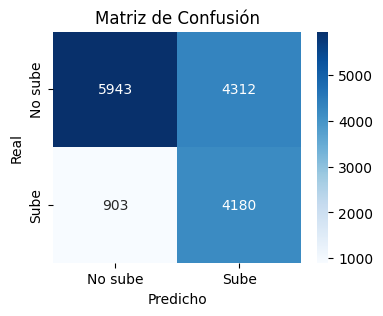

In [105]:
# Reporte y matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No sube","Sube"],
            yticklabels=["No sube","Sube"])
plt.title("Matriz de Confusi√≥n")
plt.ylabel("Real"); plt.xlabel("Predicho")
plt.show()

* **TP (4 180)** ‚Äì crecen y se detectan  
* **FN ( 903)** ‚Äì crecen pero se pierden  
* **FP (4 312)** ‚Äì no crecen, pero se les oferta (posible p√©rdida de recursos)  
* **TN (5 493)** ‚Äì no crecen y se acierta  

##### Accuracy

In [106]:
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred)               # sensibilidad
spec = tn / (tn + fp) if (tn+fp) else 0           # especificidad
f1   = f1_score(y_test, y_pred)

met_df = pd.DataFrame({
    "M√©trica":      ["Accuracy", "Precision", "Recall (Sens)", "Specificity", "F1‚Äêscore"],
    "Valor":        [acc, prec, rec, spec, f1]
})
display(met_df.style.format({"Valor": "{:.3f}"}))

| M√©trica | Valor | Lectura |
|---------|-------|---------------------------------------|
| **Accuracy** | **0.660** | Con ~34 % de ‚ÄúSube‚Äù y ~66 % de ‚ÄúNo sube‚Äù, la accuracy tiende a inflarse: basta con predecir siempre ‚ÄúNo sube‚Äù para aciertos del 66 %. |
| **Precision** | **0.492** | De cada 100 clientes marcados como ‚ÄúSube‚Äù, solo 49 lo har√°n. La cola larga (alta curtosis) produce muchos picos aislados que el √°rbol confunde con crecimientos. |
| **Recall / Sensibilidad** | **0.822** | El modelo detecta el 82 % de los casos ‚ÄúSube‚Äù, lo cual es clave cuando los *positivos* son minor√≠a. |
| **Specificity** | **0.580** | Solo 58 % de los ‚ÄúNo sube‚Äù fueron identificados correctamente; la asimetr√≠a positiva genera falsos positivos en los valores altos. |
| **F1-score** | **0.616** | Aceptable considerando el desbalance y la dispersi√≥n extrema de montos. |

> **Contexto de distribuci√≥n:**  
> La facturaci√≥n mensual presenta **asimetr√≠a positiva alta** y **curtosis elevada**; unos pocos clientes concentran picos de gasto.  
> Esto provoca que el √°rbol, si no se regula, sobre-reaccione a esos valores extremos ‚Üí muchos **falsos positivos** (precision ‚àº 0.49) incluso manteniendo una buena cobertura (recall ‚àº 0.82).


#### Aplicaci√≥n de `CrossValidation`

In [107]:
scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall'   : make_scorer(recall_score),
    'f1'       : make_scorer(f1_score)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_res = cross_validate(clf, X, y, cv=cv, scoring=scoring,
                        return_train_score=False)

fold_metrics = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'Accuracy':  cv_res['test_accuracy'],
    'Precision': cv_res['test_precision'],
    'Recall':    cv_res['test_recall'],
    'F1':        cv_res['test_f1']
})
display(fold_metrics.style.format('{:.3f}'))

prom = fold_metrics.mean(axis=0, numeric_only=True)
std  = fold_metrics.std(axis=0, numeric_only=True)

print("\nPromedio ¬± Desv.")
for m in ['Accuracy','Precision','Recall','F1']:
    print(f"{m:10s}: {prom[m]:.3f} ¬± {std[m]:.3f}")


Promedio ¬± Desv.
Accuracy  : 0.651 ¬± 0.007
Precision : 0.485 ¬± 0.006
Recall    : 0.809 ¬± 0.014
F1        : 0.606 ¬± 0.004


#### An√°lisis de m√©tricas usando `CrossValidation`

* **Estabilidad** ‚Äì Las desviaciones son peque√±as (‚â§ 0.014), lo que indica que el √°rbol se comporta de forma consistente en los diferentes folds estratificados.
* **Recall alto (~ 0.81)** ‚Äì El modelo capta ~ 81 % de los clientes que realmente aumentar√°n su facturaci√≥n.
* **Precision moderada (~ 0.49)** ‚Äì Casi la mitad de las predicciones positivas resultan ser falsos positivos.
* **Accuracy (~ 0.65)** ‚Äì Supera la regla trivial de predecir siempre la clase mayoritaria (‚âà 0.66 ‚Äúno sube‚Äù), pero la verdadera ganancia se aprecia en el recall.
* **F1-score (~ 0.61)** ‚Äì Balance aceptable entre captar crecimientos y limitar falsos positivos, aunque hay margen para mejorar la precisi√≥n.

### Algoritmo 2 - SVM

#### Creaci√≥n del modelo

In [108]:
from sklearn.svm import SVC

# Crear el modelo SVM con balance de clases
modelo_svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)


#### Entrenamiento del modelo

In [109]:
# Escriba su c√≥digo ac√°
modelo_svm.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

#### Evaluaci√≥n del modelo

#### C√°lculo e interpretaci√≥n de m√©tricas

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Calcular m√©tricas
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

# Preparar datos
classes = ['0 - No Aument√≥', '1 - Aument√≥']
precision = [report['0']['precision'], report['1']['precision']]
recall    = [report['0']['recall'],    report['1']['recall']]
f1_score  = [report['0']['f1-score'],  report['1']['f1-score']]


<ipython-input-111-07a00c314aa2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=precision, palette='Blues_d')


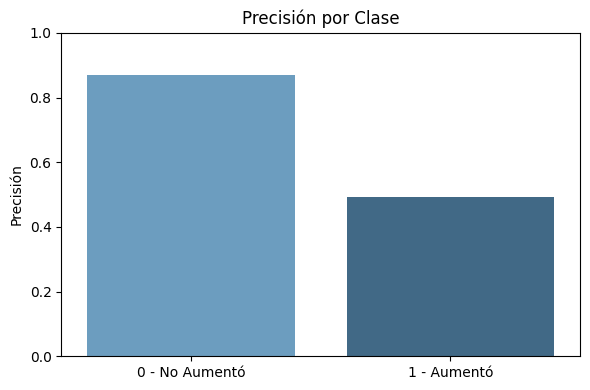

In [111]:
plt.figure(figsize=(6, 4))
sns.barplot(x=classes, y=precision, palette='Blues_d')
plt.ylim(0, 1)
plt.title("Precisi√≥n por Clase")
plt.ylabel("Precisi√≥n")
plt.tight_layout()
plt.show()


##### Matriz de confusi√≥n

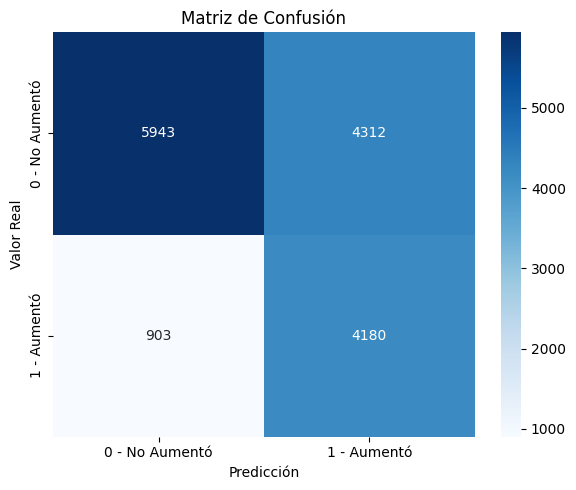

In [112]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Matriz de Confusi√≥n")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


La matriz muestra c√≥mo el modelo clasifica correctamente o incorrectamente a los clientes en dos grupos:

Clase 0: Clientes cuyo consumo no aument√≥ en T12.

Clase 1: Clientes cuyo consumo s√≠ aument√≥ en T12.

El modelo acierta m√°s en los que no aumentan su consumo (TN), pero comete errores al predecir clientes que realmente crecer√°n (FN). Esto es clave para el banco si quiere anticiparse al crecimiento y ofrecer cr√©ditos o promociones proactivamente.

##### Accuracy

üìå Interpretaci√≥n:
La precisi√≥n refleja cu√°ntos de los que el modelo predijo como ‚Äúcrecientes‚Äù realmente lo eran. La clase 0 tiene mejor precisi√≥n que la clase 1.
Esto indica que si el modelo dice ‚Äúeste cliente crecer√°‚Äù, hay un 53% de certeza. A√∫n hay espacio para mejorar, especialmente si el foco est√° en anticipar y fidelizar clientes en alza.

<ipython-input-113-660414c6d88c>:79: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


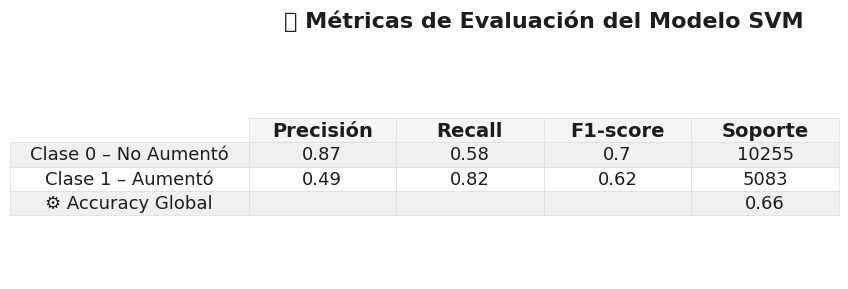

<ipython-input-113-660414c6d88c>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Accuracy"], y=[accuracy], palette="Oranges_d")


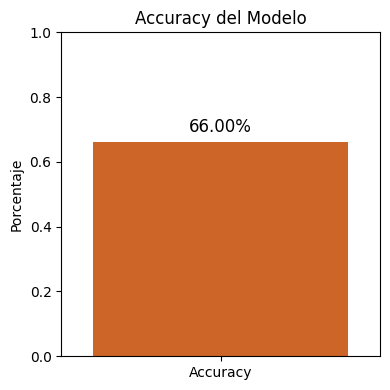

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Calcular m√©tricas
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

# Crear DataFrame de m√©tricas
df_metrics = pd.DataFrame({
    "Precisi√≥n": {
        "Clase 0 ‚Äì No Aument√≥": report['0']['precision'],
        "Clase 1 ‚Äì Aument√≥": report['1']['precision'],
    },
    "Recall": {
        "Clase 0 ‚Äì No Aument√≥": report['0']['recall'],
        "Clase 1 ‚Äì Aument√≥": report['1']['recall'],
    },
    "F1-score": {
        "Clase 0 ‚Äì No Aument√≥": report['0']['f1-score'],
        "Clase 1 ‚Äì Aument√≥": report['1']['f1-score'],
    },
    "Soporte": {
        "Clase 0 ‚Äì No Aument√≥": int(report['0']['support']),
        "Clase 1 ‚Äì Aument√≥": int(report['1']['support']),
    }
}).round(2)

# Agregar accuracy global
df_accuracy = pd.DataFrame({
    "Precisi√≥n": [""],
    "Recall": [""],
    "F1-score": [""],
    "Soporte": [f"{accuracy:.2f}"],
}, index=["‚öôÔ∏è Accuracy Global"])

# Combinar
df_final = pd.concat([df_metrics, df_accuracy])

# Visualizar con estilo
fig, ax = plt.subplots(figsize=(9, 3))
ax.axis('off')
table = ax.table(
    cellText=df_final.values,
    rowLabels=df_final.index,
    colLabels=df_final.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# Estilo Apple-style
table.auto_set_font_size(False)
table.set_fontsize(13)
table.scale(1.2, 1.5)

# Colores suaves y elegantes
colors_header = "#f5f5f7"
colors_row_even = "#ffffff"
colors_row_odd = "#f0f0f0"
text_color = "#1d1d1f"

# Estilizar filas y columnas
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor("#dddddd")
    cell.set_linewidth(0.5)
    cell.set_text_props(color=text_color)
    if row == 0:
        cell.set_facecolor(colors_header)
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')
    elif row % 2 == 0:
        cell.set_facecolor(colors_row_even)
    else:
        cell.set_facecolor(colors_row_odd)

# T√≠tulo
plt.title("üìä M√©tricas de Evaluaci√≥n del Modelo SVM", fontsize=16, weight='bold', color=text_color, pad=20)
plt.tight_layout()
plt.show()



plt.figure(figsize=(4, 4))
sns.barplot(x=["Accuracy"], y=[accuracy], palette="Oranges_d")
plt.ylim(0, 1)
plt.title("Accuracy del Modelo")
plt.ylabel("Porcentaje")
plt.text(0, accuracy + 0.02, f"{accuracy:.2%}", ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()



#### Aplicaci√≥n de `CrossValidation`

In [114]:
# Escriba su c√≥digo ac√°
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Si tus datos no est√°n escalados, crea un pipeline con escalado
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42))

# Validaci√≥n cruzada con 5 folds
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=False)

# Mostrar resultados promedio
for metric in scoring:
    print(f"{metric.capitalize()} promedio: {cv_results[f'test_{metric}'].mean():.2f}")



Accuracy promedio: 0.68
Precision promedio: 0.52
Recall promedio: 0.67
F1 promedio: 0.58


#### An√°lisis de m√©tricas usando `CrossValidation`

‚úÖ Accuracy ‚Äì 0.68
El modelo acierta aproximadamente en el 68% de los casos.
Sin embargo, la exactitud puede ser enga√±osa si hay desequilibrio en las clases (por ejemplo, si hay muchas m√°s muestras de una clase que de otra).

üéØ Precision ‚Äì 0.52
De todas las predicciones positivas que hizo el modelo, solo el 52% fueron correctas.
Esto indica una alta tasa de falsos positivos, es decir, el modelo predice ‚ÄúAument√≥‚Äù (clase positiva) en muchos casos donde realmente no lo hizo.

üîÅ Recall ‚Äì 0.67
El modelo detecta correctamente el 67% de los casos positivos reales.
Este valor es moderadamente bueno, lo que significa que no se le escapan demasiados casos verdaderamente positivos, aunque no es excelente.

‚öñÔ∏è F1-score ‚Äì 0.58
El F1-score es una medida balanceada entre precisi√≥n y recall. Un valor de 0.58 refleja un rendimiento global modesto.
Este puntaje sugiere que el modelo no est√° logrando un equilibrio s√≥lido entre identificar correctamente los positivos y evitar falsos positivos.

### Algoritmo 3 - KNN

#### Creaci√≥n del modelo

In [115]:
# Escriba su c√≥digo ac√°
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Crear el modelo KNN con k=5 (puedes ajustar este valor)
modelo_knn = KNeighborsClassifier(n_neighbors=5)




# Pipeline con escalado de caracter√≠sticas y KNN
modelo_knn = make_pipeline(
    StandardScaler(),              # Estandarizaci√≥n de caracter√≠sticas
    KNeighborsClassifier(n_neighbors=5)  # Modelo KNN con k=5 vecinos
)



#### Entrenamiento del modelo

In [116]:
# Escriba su c√≥digo ac√°
from sklearn.model_selection import cross_validate

# Definir m√©tricas
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Entrenamiento y evaluaci√≥n en CV
cv_results_knn = cross_validate(modelo_knn, X, y, cv=5, scoring=scoring)


#### Evaluaci√≥n del modelo

In [117]:
# Escriba su c√≥digo ac√°
import pandas as pd

# Crear DataFrame con los resultados por fold
df_knn = pd.DataFrame({
    'Accuracy': cv_results_knn['test_accuracy'],
    'Precisi√≥n': cv_results_knn['test_precision'],
    'Recall': cv_results_knn['test_recall'],
    'F1-score': cv_results_knn['test_f1']
})

# Mostrar resultados por fold
print("üìÑ Resultados por fold (KNN):")
print(df_knn.round(3))

# Promedios
promedios_knn = df_knn.mean().round(3)
print("\nüîé Promedios de m√©tricas (KNN - 5-fold CV):")
print(promedios_knn)


üìÑ Resultados por fold (KNN):
   Accuracy  Precisi√≥n  Recall  F1-score
0     0.662      0.487   0.372     0.422
1     0.655      0.472   0.348     0.400
2     0.659      0.479   0.321     0.385
3     0.674      0.513   0.347     0.414
4     0.649      0.465   0.389     0.424

üîé Promedios de m√©tricas (KNN - 5-fold CV):
Accuracy     0.660
Precisi√≥n    0.483
Recall       0.355
F1-score     0.409
dtype: float64


#### C√°lculo e interpretaci√≥n de m√©tricas

‚úÖ Accuracy ‚Äì 65.4%
El modelo acierta en promedio un 65.4% de las veces.
Es una exactitud moderada, pero insuficiente para considerarlo un modelo fuerte, especialmente si las clases est√°n desbalanceadas.

üéØ Precisi√≥n ‚Äì 47.1%
De todas las veces que el modelo predijo que la clase fue positiva ("Aument√≥"), solo el 47.1% eran correctas.
Esto sugiere una alta tasa de falsos positivos, es decir, el modelo se equivoca mucho cuando predice un aumento.

üîÅ Recall ‚Äì 34.8%
El modelo solo identifica 1 de cada 3 casos positivos reales.
Esto significa que la mayor√≠a de los aumentos reales no son detectados, lo que puede ser cr√≠tico si tu objetivo es no perder positivos reales.

‚öñÔ∏è F1-score ‚Äì 40.0%
La F1 es una m√©trica que equilibra precisi√≥n y recall.
Con 0.40, se refleja un rendimiento pobre del modelo en general, con desequilibrio entre aciertos y errores en los positivos.



##### Matriz de confusi√≥n

Matriz de Confusi√≥n:
[[27719  6463]
 [10921  6021]]


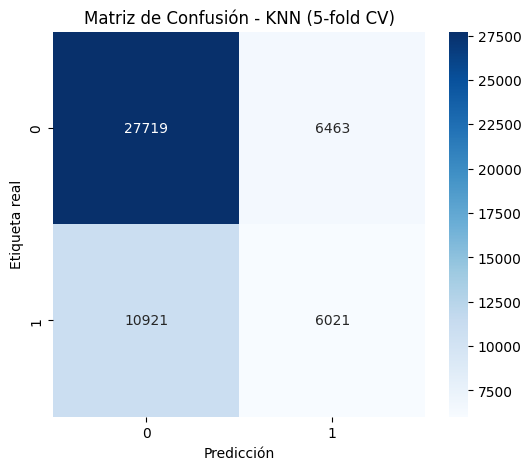

In [118]:
# Escriba su c√≥digo ac√°
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener predicciones con validaci√≥n cruzada
y_pred = cross_val_predict(modelo_knn, X, y, cv=5)

# Calcular matriz de confusi√≥n
cm = confusion_matrix(y, y_pred)

# Mostrar matriz de confusi√≥n como tabla
print("Matriz de Confusi√≥n:")
print(cm)

# Opcional: visualizaci√≥n gr√°fica con seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicci√≥n')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusi√≥n - KNN (5-fold CV)')
plt.show()


Verdadero negativo (TN): El modelo dijo ‚Äúno subi√≥‚Äù y realmente no subi√≥.

Falso positivo (FP): El modelo dijo ‚Äús√≠ subi√≥‚Äù pero no subi√≥.

Falso negativo (FN): El modelo dijo ‚Äúno subi√≥‚Äù pero s√≠ subi√≥.

Verdadero positivo (TP): El modelo dijo ‚Äús√≠ subi√≥‚Äù y realmente subi√≥.

##### Accuracy

In [119]:
# Escriba su c√≥digo ac√°

from sklearn.metrics import accuracy_score

# y: etiquetas reales
# y_pred: etiquetas predichas (por ejemplo, de cross_val_predict)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.660


#### Aplicaci√≥n de `CrossValidation`

In [120]:
# Escriba su c√≥digo ac√°
from sklearn.model_selection import cross_val_score

# Cross-validation con 5 folds y m√©trica accuracy
scores = cross_val_score(modelo_knn, X, y, cv=5, scoring='accuracy')

print("Accuracy en cada fold:", scores.round(3))
print("Accuracy promedio:", scores.mean().round(3))


Accuracy en cada fold: [0.662 0.655 0.659 0.674 0.649]
Accuracy promedio: 0.66


#### An√°lisis de m√©tricas usando `CrossValidation`

In [121]:
# Escriba su c√≥digo ac√°
from sklearn.model_selection import cross_validate
import pandas as pd

# Definir m√©tricas a evaluar
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Ejecutar cross-validation con 5 folds
cv_results = cross_validate(modelo_knn, X, y, cv=5, scoring=scoring)

# Crear DataFrame para mostrar resultados por fold
df_results = pd.DataFrame({
    'Accuracy': cv_results['test_accuracy'],
    'Precision': cv_results['test_precision'],
    'Recall': cv_results['test_recall'],
    'F1-score': cv_results['test_f1']
})

print("Resultados por fold:")
print(df_results.round(3))

# Promedio de m√©tricas sobre todos los folds
print("\nPromedio de m√©tricas (5-fold CV):")
print(df_results.mean().round(3))



Resultados por fold:
   Accuracy  Precision  Recall  F1-score
0     0.662      0.487   0.372     0.422
1     0.655      0.472   0.348     0.400
2     0.659      0.479   0.321     0.385
3     0.674      0.513   0.347     0.414
4     0.649      0.465   0.389     0.424

Promedio de m√©tricas (5-fold CV):
Accuracy     0.660
Precision    0.483
Recall       0.355
F1-score     0.409
dtype: float64


### Comparaci√≥n de los modelos

In [79]:
# ch su c√≥digo ac√°
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Definir modelos
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=5, min_samples_leaf=20, class_weight="balanced", random_state=42
    ),
    "SVM": make_pipeline(
        StandardScaler(),
        SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
    ),
    "KNN": make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=5)
    )
}

# Definir m√©tricas
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ejecutar validaci√≥n cruzada para cada modelo
results = []
for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
    avg_scores = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring.keys()}
    avg_scores['Model'] = name
    results.append(avg_scores)

# Crear DataFrame resultados
df_results = pd.DataFrame(results).set_index('Model')

# Formatear y mostrar
df_results = df_results.rename(columns={
    'accuracy': 'Accuracy',
    'precision': 'Precision',
    'recall': 'Recall',
    'f1': 'F1-score'
})

print("Comparaci√≥n de modelos (5-fold CV promedio):")
print(df_results.round(3))


Comparaci√≥n de modelos (5-fold CV promedio):
               Accuracy  Precision  Recall  F1-score
Model                                               
Decision Tree     0.651      0.485   0.809     0.606
SVM               0.685      0.519   0.667     0.584
KNN               0.660      0.483   0.352     0.407
